In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats

### Data Exploration

In [2]:
# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("telcom_data (2).xlsx - Sheet1.csv")
df.columns = [c.strip() for c in df.columns]   # clean spaces


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.shape

(150001, 55)

In [5]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [6]:
df.describe

<bound method NDFrame.describe of            Bearer Id          Start  Start ms            End  End ms  \
0       1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0   
1       1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0   
2       1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0   
3       1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0   
4       1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0   
...              ...            ...       ...            ...     ...   
149996  7.277830e+18   4/29/19 7:28     451.0   4/30/19 6:02   214.0   
149997  7.349880e+18   4/29/19 7:28     483.0  4/30/19 10:41   187.0   
149998  1.311450e+19   4/29/19 7:28     283.0  4/30/19 10:46   810.0   
149999  1.311450e+19   4/29/19 7:28     696.0  4/30/19 10:40   327.0   
150000           NaN            NaN       NaN            NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.3

### 2.Data Preprocessing and cleaning 

In [7]:
#find Null Values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
10 Kbps < UL TP < 50 Kbps (%)                  792
UL TP > 300 Kbps (%)                           792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP < 10 Kbps (%)            

In [8]:
# # Drop columns with more than 60% missing values
drop_cols = missing[missing > 0.6 * len(df)].index.tolist()
print("drop columns",drop_cols)
df.drop(columns=drop_cols, inplace=True)
print(df.columns.tolist())

drop columns ['TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B']
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Soc

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill NaN with median
medians = df[numeric_cols].median()
df[numeric_cols] = df[numeric_cols].fillna(medians)

In [10]:
# # Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


C:\Users\mohan\AppData\Local\Temp\ipykernel_10356\3215846245.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
# # Confirm all missing values handled
print("✅ Missing values after cleaning:", df.isnull().sum().sum())

✅ Missing values after cleaning: 0


### Task 1 : User Overview Analysis

In [12]:
# Duration (convert ms → s if needed)

In [13]:
user_col = next((c for c in df.columns if 'imsi' in c.lower() or 'msisdn' in c.lower()), None)
duration_col = next((c for c in df.columns if 'dur' in c.lower()), None)

# Duration (convert ms → s if needed)
if duration_col and 'ms' in duration_col.lower():
    df['Duration_s'] = pd.to_numeric(df[duration_col], errors='coerce')/1000.0
else:
    df['Duration_s'] = pd.to_numeric(df.get(duration_col, np.nan), errors='coerce')


In [14]:
#Calaculate total Bytes

In [15]:
apps = ['Social Media','Google','Email','Youtube','Netflix','Gaming','Other']

for app in apps:
    dl = next((c for c in df.columns if app.lower() in c.lower() and 'dl' in c.lower()), None)
    ul = next((c for c in df.columns if app.lower() in c.lower() and 'ul' in c.lower()), None)
    if dl or ul:
        df[f"{app} Total (Bytes)"] = df[[c for c in [dl,ul] if c is not None]].sum(axis=1)

# Total bytes
df['Total DL (Bytes)'] = df[[c for c in df.columns if 'dl' in c.lower()]].sum(axis=1)
df['Total UL (Bytes)'] = df[[c for c in df.columns if 'ul' in c.lower()]].sum(axis=1)
df['Total Bytes'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df[['Total DL (Bytes)','Total UL (Bytes)','Total Bytes']].head()

,Total DL (Bytes),Total UL (Bytes),Total Bytes
0,7.920527e+08,73768365.0,8.658211e+08
1,1.836186e+09,107835228.0,1.944022e+09
2,9.728191e+08,55997818.0,1.028817e+09
3,2.443611e+09,86916407.0,2.530528e+09
4,1.691498e+09,77316079.0,1.768814e+09


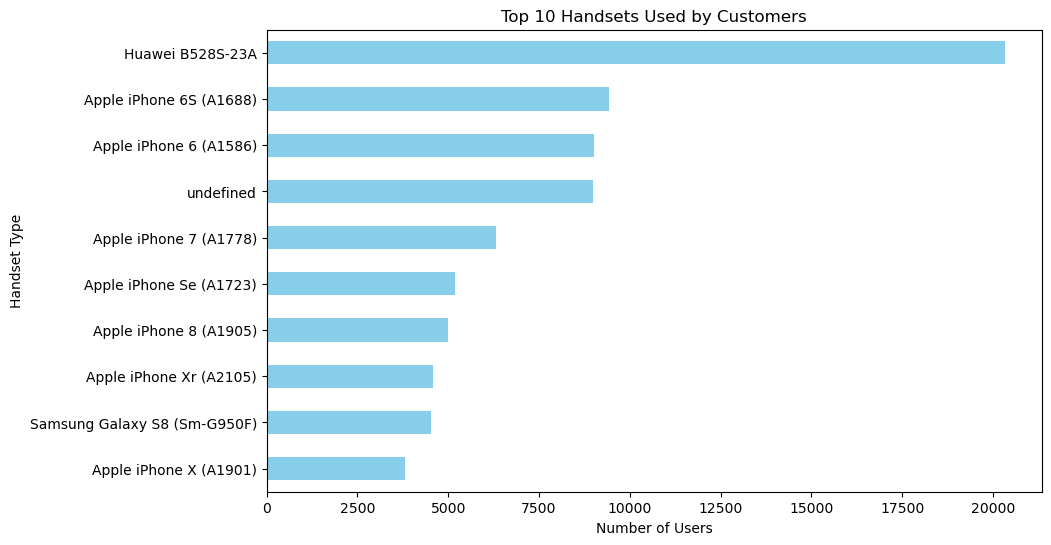

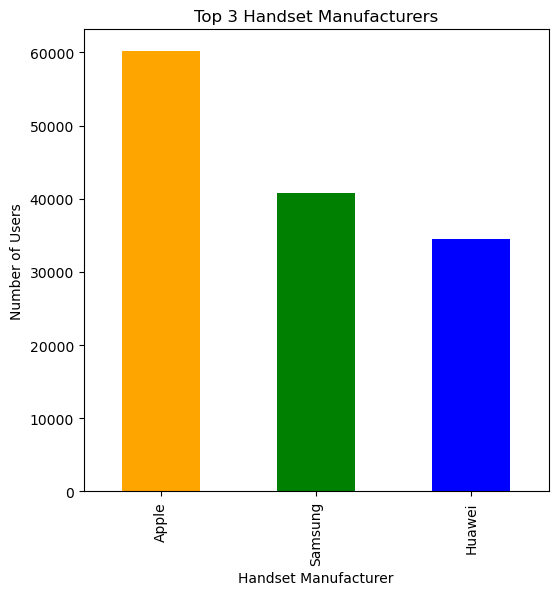

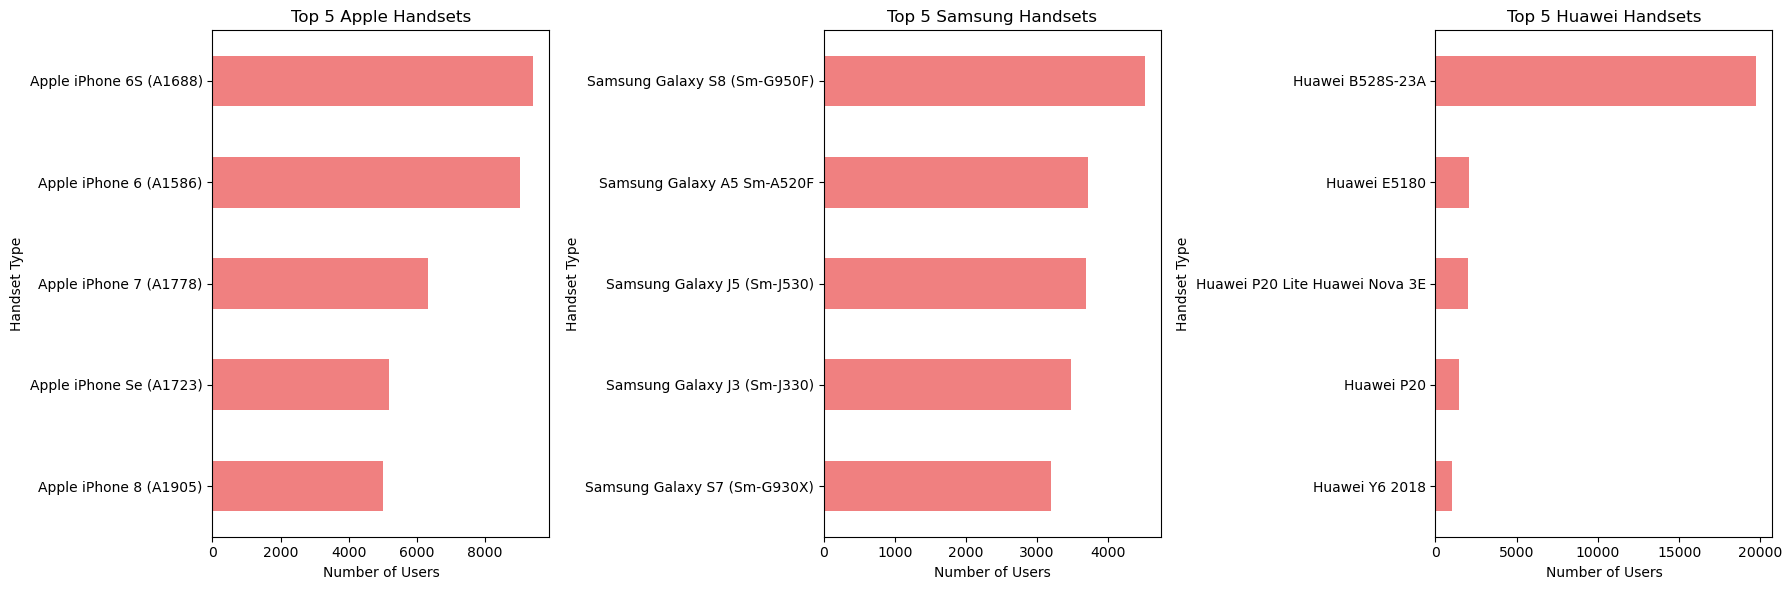

In [16]:
# === Step 1: Top 10 Handsets ===
top_10_handsets = df['Handset Type'].value_counts().head(10)

# === Step 2: Top 3 Manufacturers ===
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# === Step 3: Top 5 Handsets per Top 3 Manufacturers ===
top_5_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    handsets = (
        df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
        .value_counts()
        .head(5)
    )
    top_5_per_manufacturer[manufacturer] = handsets

# -------- VISUALIZATIONS --------

# Plot Top 10 Handsets
plt.figure(figsize=(10,6))
top_10_handsets.sort_values().plot(kind="barh", color="skyblue")
plt.title("Top 10 Handsets Used by Customers")
plt.xlabel("Number of Users")
plt.ylabel("Handset Type")
plt.show()

# Plot Top 3 Manufacturers
plt.figure(figsize=(6,6))
top_3_manufacturers.plot(kind="bar", color=["orange","green","blue"])
plt.title("Top 3 Handset Manufacturers")
plt.ylabel("Number of Users")
plt.show()

# Plot Top 5 Handsets per Manufacturer
fig, axes = plt.subplots(1, 3, figsize=(18,6))
for ax, (manufacturer, handsets) in zip(axes, top_5_per_manufacturer.items()):
    handsets.sort_values().plot(kind="barh", ax=ax, color="lightcoral")
    ax.set_title(f"Top 5 {manufacturer} Handsets")
    ax.set_xlabel("Number of Users")
    ax.set_ylabel("Handset Type")
plt.tight_layout()
plt.show()



### Outliers detection and removal


📌 Showing top 5 columns with most outliers:
{'Bearer Id': 0, 'Start ms': 0, 'End ms': 0, 'Dur. (ms)': 2214, 'IMSI': 3, 'MSISDN/Number': 2, 'IMEI': 0, 'Avg RTT DL (ms)': 818, 'Avg RTT UL (ms)': 751, 'Avg Bearer TP DL (kbps)': 2983, 'Avg Bearer TP UL (kbps)': 4269, 'TCP DL Retrans. Vol (Bytes)': 550, 'DL TP < 50 Kbps (%)': 3467, '50 Kbps < DL TP < 250 Kbps (%)': 3462, '250 Kbps < DL TP < 1 Mbps (%)': 3147, 'DL TP > 1 Mbps (%)': 3464, 'UL TP < 10 Kbps (%)': 2199, '10 Kbps < UL TP < 50 Kbps (%)': 2018, '50 Kbps < UL TP < 300 Kbps (%)': 1029, 'UL TP > 300 Kbps (%)': 749, 'HTTP DL (Bytes)': 552, 'HTTP UL (Bytes)': 691, 'Activity Duration DL (ms)': 3558, 'Activity Duration UL (ms)': 2958, 'Dur. (ms).1': 2214, 'Nb of sec with 6250B < Vol DL < 31250B': 2582, 'Nb of sec with Vol DL < 6250B': 3010, 'Nb of sec with Vol UL < 1250B': 3708, 'Social Media DL (Bytes)': 0, 'Social Media UL (Bytes)': 0, 'Google DL (Bytes)': 0, 'Google UL (Bytes)': 0, 'Email DL (Bytes)': 0, 'Email UL (Bytes)': 0, 'Youtub

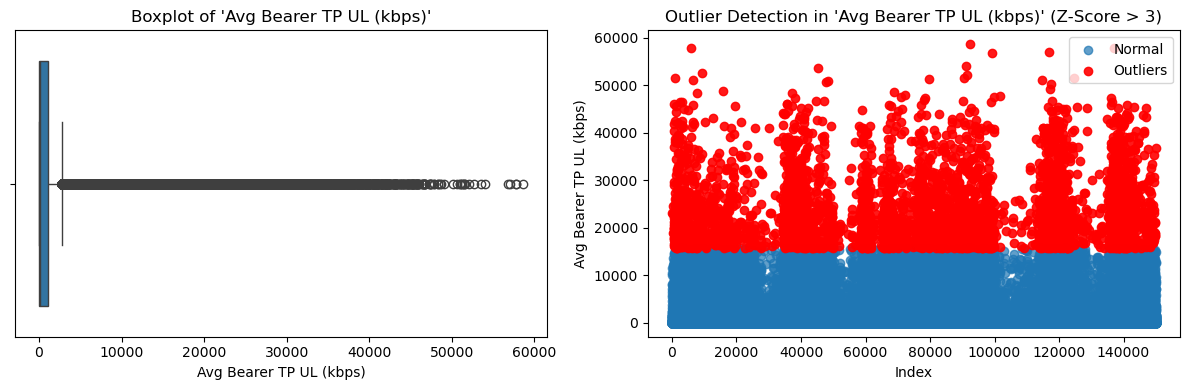

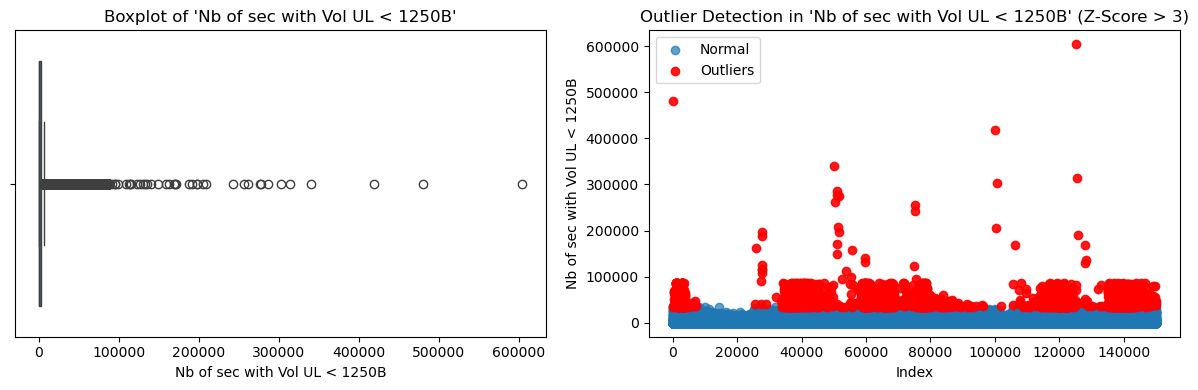

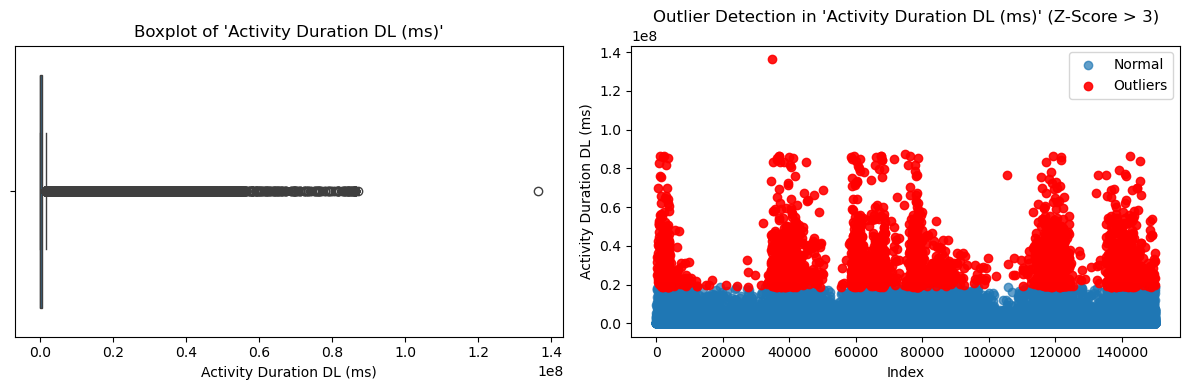

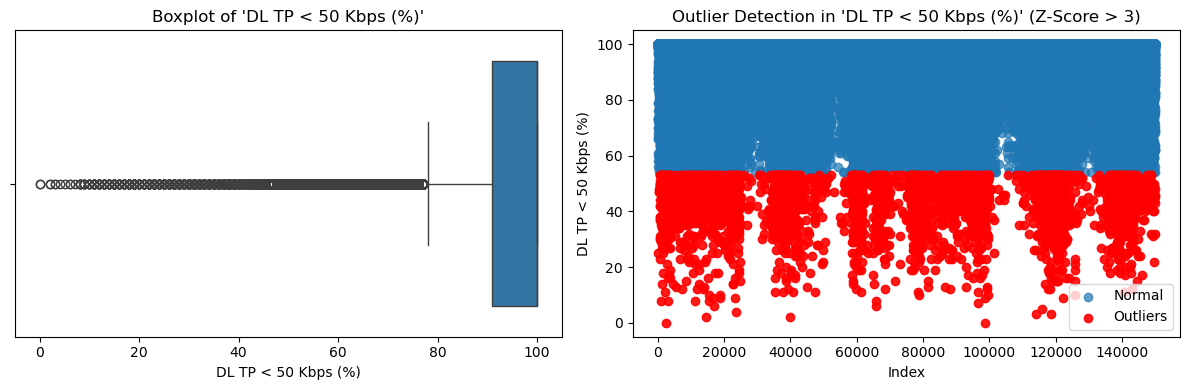

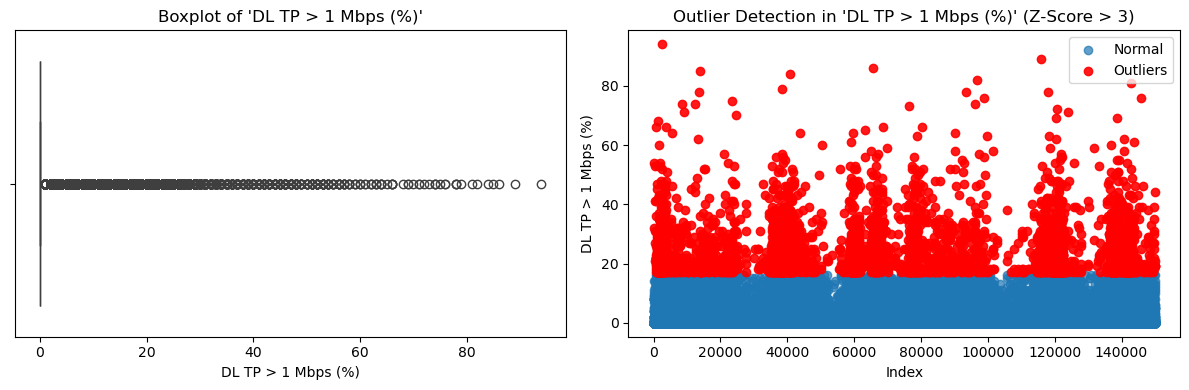

In [17]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
z_threshold = 3
top_n = 5   # 👈 change this to see more/less columns

# Count outliers per column
outlier_counts = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outlier_counts[col] = (z_scores > z_threshold).sum()

# Sort by outlier count
sorted_cols = sorted(outlier_counts, key=outlier_counts.get, reverse=True)[:top_n]

print(f"\n📌 Showing top {top_n} columns with most outliers:")
print(outlier_counts)

# Plot boxplot + scatter for top N columns
for col in sorted_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > z_threshold]
    normal = df[z_scores <= z_threshold]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Boxplot ---
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"Boxplot of '{col}'")

    # --- Scatterplot ---
    axes[1].scatter(normal.index, normal[col], label="Normal", alpha=0.7)
    axes[1].scatter(outliers.index, outliers[col], color="red", label="Outliers", alpha=0.9)
    axes[1].set_title(f"Outlier Detection in '{col}' (Z-Score > {z_threshold})")
    axes[1].set_xlabel("Index")
    axes[1].set_ylabel(col)
    axes[1].legend()

    plt.tight_layout()
    plt.show()



In [18]:
import numpy as np
import pandas as pd
from scipy import stats

def handle_outliers(df, z_threshold=3):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_idx = df.index[z_scores > z_threshold]
               
        if len(outlier_idx) > 0:
            print(f"Handling {len(outlier_idx)} outliers in '{col}' using Median")
            df.loc[outlier_idx, col] = df[col].median()
            
        else:
            print(f" No outliers detected in '{col}'")

    return df
df_clean = handle_outliers(df)

 No outliers detected in 'Bearer Id'
 No outliers detected in 'Start ms'
 No outliers detected in 'End ms'
Handling 2214 outliers in 'Dur. (ms)' using Median
Handling 3 outliers in 'IMSI' using Median
Handling 2 outliers in 'MSISDN/Number' using Median
 No outliers detected in 'IMEI'
Handling 818 outliers in 'Avg RTT DL (ms)' using Median
Handling 751 outliers in 'Avg RTT UL (ms)' using Median
Handling 2983 outliers in 'Avg Bearer TP DL (kbps)' using Median
Handling 4269 outliers in 'Avg Bearer TP UL (kbps)' using Median
Handling 550 outliers in 'TCP DL Retrans. Vol (Bytes)' using Median
Handling 3467 outliers in 'DL TP < 50 Kbps (%)' using Median
Handling 3462 outliers in '50 Kbps < DL TP < 250 Kbps (%)' using Median
Handling 3147 outliers in '250 Kbps < DL TP < 1 Mbps (%)' using Median
Handling 3464 outliers in 'DL TP > 1 Mbps (%)' using Median
Handling 2199 outliers in 'UL TP < 10 Kbps (%)' using Median
Handling 2018 outliers in '10 Kbps < UL TP < 50 Kbps (%)' using Median
Handling 

### Task 1.1 

In [19]:

# Aggregate per user
user_agg = df.groupby("MSISDN/Number").agg(
    number_of_sessions=("Bearer Id", "count"),        # Number of xDR sessions
    total_session_duration=("Dur. (ms)", "sum"),      # Total session duration
    total_dl=("Total DL (Bytes)", "sum"),             # Total Download
    total_ul=("Total UL (Bytes)", "sum"),             # Total Upload
)

# Add total volume
user_agg["total_volume"] = user_agg["total_dl"] + user_agg["total_ul"]

# Per-application traffic
apps = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]
for app in apps:
    dl = f"{app} DL (Bytes)"
    ul = f"{app} UL (Bytes)"
    user_agg[f"{app.lower()}_total"] = df.groupby("MSISDN/Number")[[dl, ul]].sum().sum(axis=1)

# Reset index for cleaner DataFrame
user_agg = user_agg.reset_index()

# Show first few rows
print(user_agg.head())

   MSISDN/Number  number_of_sessions  total_session_duration      total_dl  \
0   3.360100e+10                   1                116720.0  2.064910e+09   
1   3.360100e+10                   1                181230.0  5.236287e+08   
2   3.360100e+10                   1                134969.0  1.610934e+09   
3   3.360101e+10                   1                 49878.0  8.292570e+08   
4   3.360101e+10                   2                 37104.0  3.705664e+09   

      total_ul  total_volume  social media_total  google_total  email_total  \
0   72369829.0  2.137280e+09           2232135.0     4389005.0    1331362.0   
1   72493801.0  5.961225e+08           2660565.0     5334863.0    3307781.0   
2   78862055.0  1.689796e+09           3195623.0     3443126.0    3205380.0   
3   40660455.0  8.699175e+08            280294.0     9678493.0    2284670.0   
4  196680691.0  3.902345e+09           2912542.0    18499616.0    3305469.0   

   youtube_total  netflix_total  gaming_total  other_tot

### Task1.2

In [20]:
# --------- VARIABLES & DATA TYPES ---------
print("\n=== Variables and Data Types ===")
print(df.dtypes)


=== Variables and Data Types ===
Bearer Id                                 float64
Start                                      object
Start ms                                  float64
End                                        object
End ms                                    float64
Dur. (ms)                                 float64
IMSI                                      float64
MSISDN/Number                             float64
IMEI                                      float64
Last Location Name                         object
Avg RTT DL (ms)                           float64
Avg RTT UL (ms)                           float64
Avg Bearer TP DL (kbps)                   float64
Avg Bearer TP UL (kbps)                   float64
TCP DL Retrans. Vol (Bytes)               float64
DL TP < 50 Kbps (%)                       float64
50 Kbps < DL TP < 250 Kbps (%)            float64
250 Kbps < DL TP < 1 Mbps (%)             float64
DL TP > 1 Mbps (%)                        float64
UL TP < 10 Kbps 

In [21]:
# ---------BASIC METRICS (Mean, Median, Std, etc.) ---------
print("\n=== Basic Metrics ===")
print(df.describe())


=== Basic Metrics ===
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.012045e+19     499.188199     498.800888  1.046084e+05  2.082016e+14   
std    2.892435e+18     288.610872     288.096693  8.103736e+04  2.144723e+10   
min    6.917540e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349880e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349880e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304240e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318650e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.182441e+10  4.842592e+13        97.774455        15.315031   
std     2.438731e+12  2.238739e

In [22]:
# --------- NON-GRAPHICAL UNIVARIATE ANALYSIS ---------
print("\n=== Dispersion Parameters ===")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col}: variance={df[col].var():.2f}, std={df[col].std():.2f}, range=({df[col].min()}, {df[col].max()})")


=== Dispersion Parameters ===
Bearer Id: variance=8366180088569974559407554071841734656.00, std=2892434975685706752.00, range=(6.91754e+18, 1.31865e+19)
Start ms: variance=83296.24, std=288.61, range=(0.0, 999.0)
End ms: variance=82999.70, std=288.10, range=(0.0, 999.0)
Dur. (ms): variance=6567054524.90, std=81037.36, range=(7142.0, 1859336.0)
IMSI: variance=459983476393203597312.00, std=21447225377.50, range=(204047108489451.0, 214074303349628.0)
MSISDN/Number: variance=5947410686283824039460864.00, std=2438731368208.44, range=(33601001722.0, 882397108489451.0)
IMEI: variance=501195345829986481687494656.00, std=22387392564342.69, range=(440015202000.0, 99001201327774.0)
Avg RTT DL (ms): variance=313498.59, std=559.91, range=(0.0, 96923.0)
Avg RTT UL (ms): variance=5881.05, std=76.69, range=(0.0, 7120.0)
Avg Bearer TP DL (kbps): variance=574648297.92, std=23971.82, range=(0.0, 378160.0)
Avg Bearer TP UL (kbps): variance=21393790.31, std=4625.34, range=(0.0, 58613.0)
TCP DL Retrans. Vo

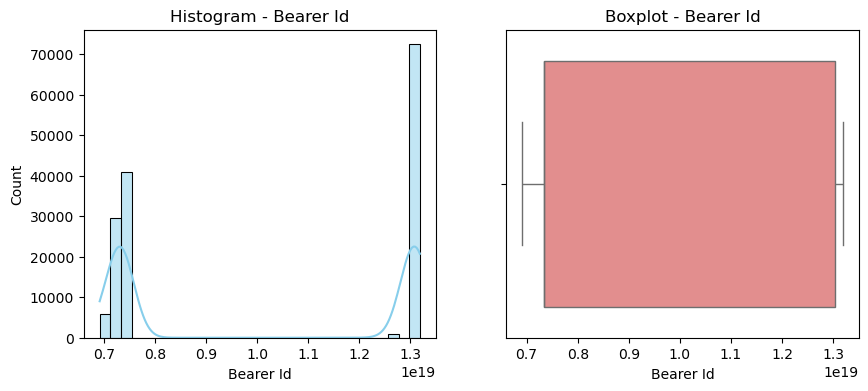

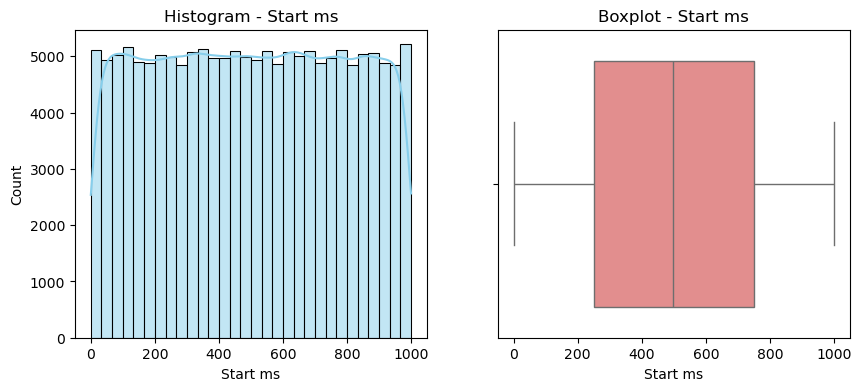

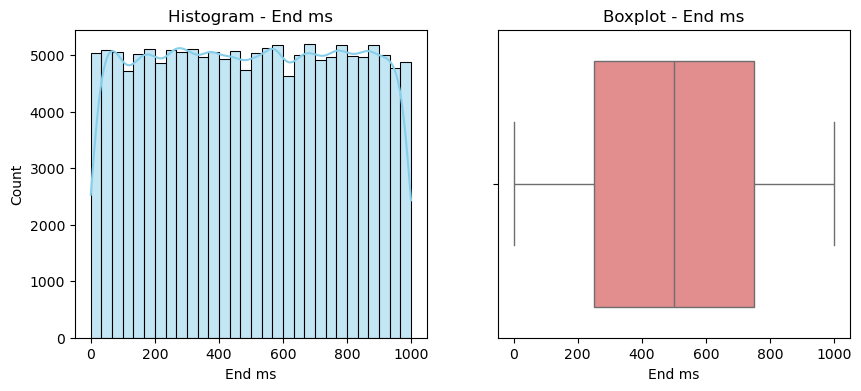

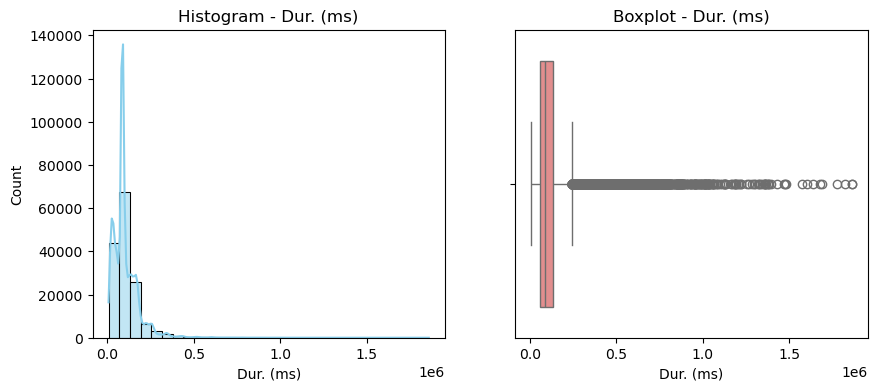

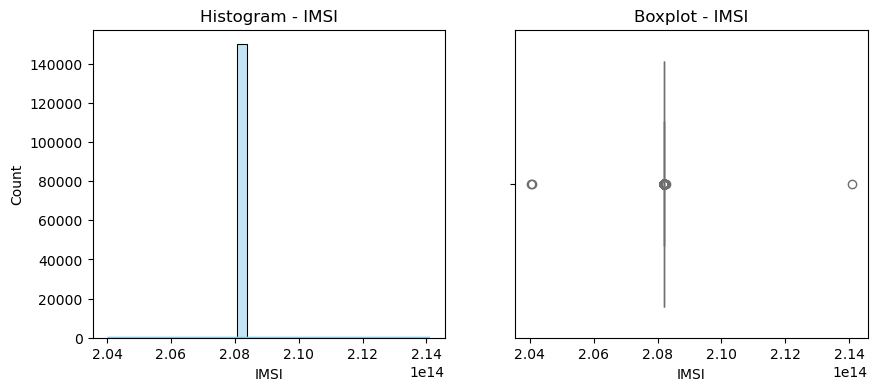

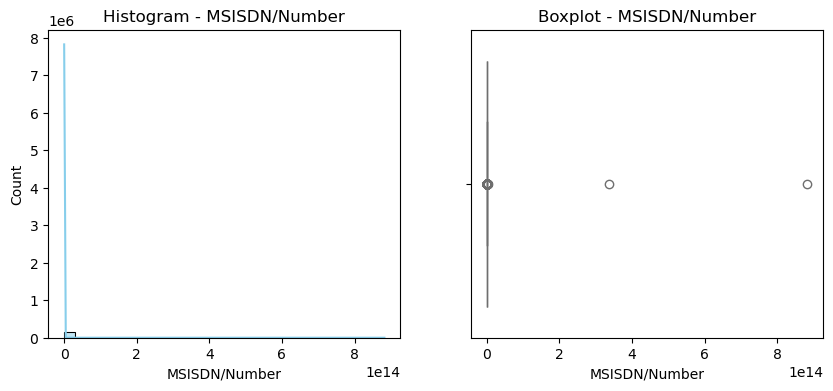

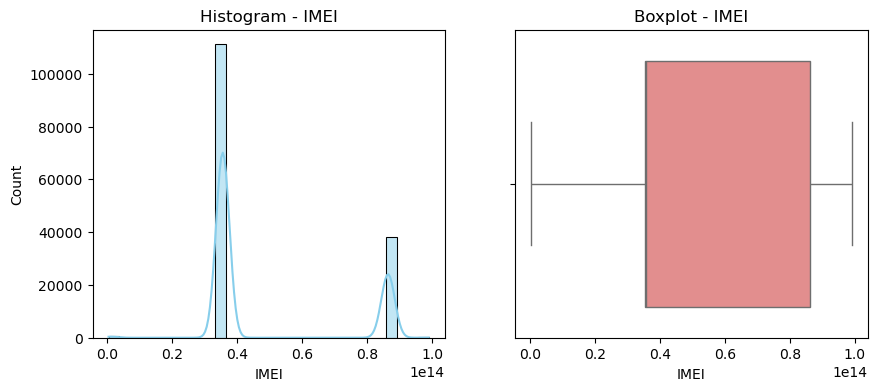

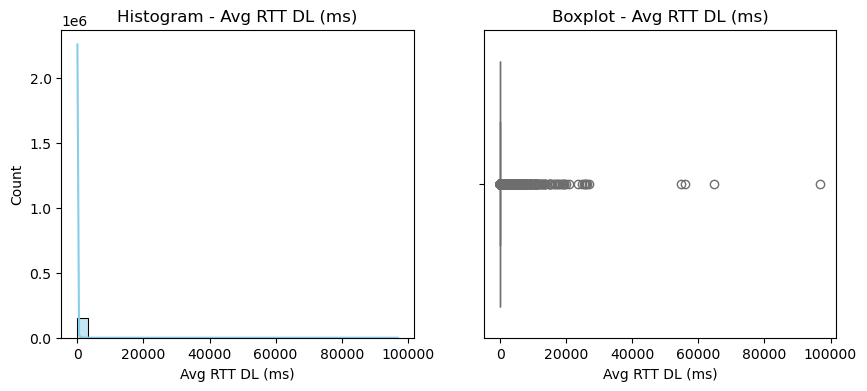

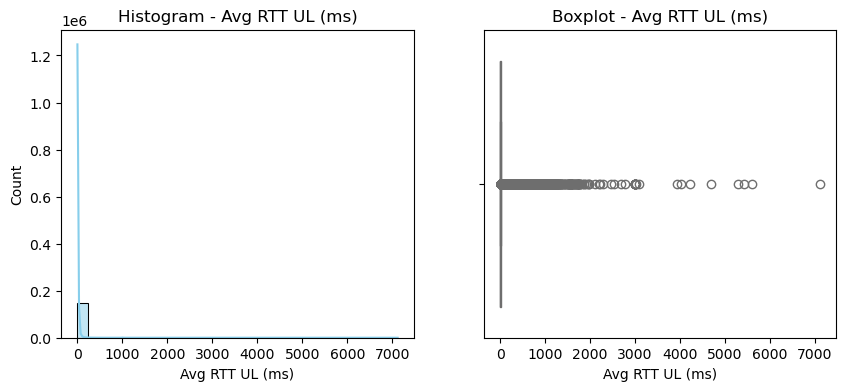

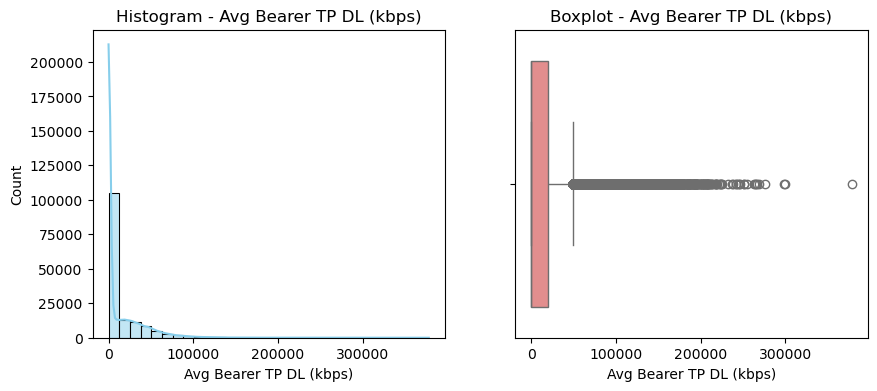

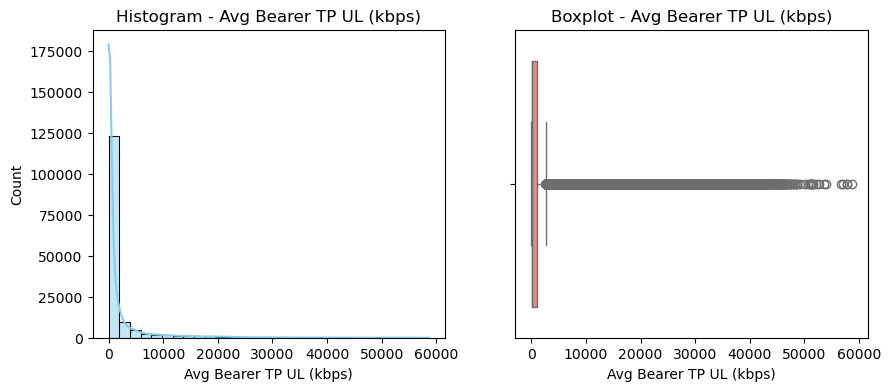

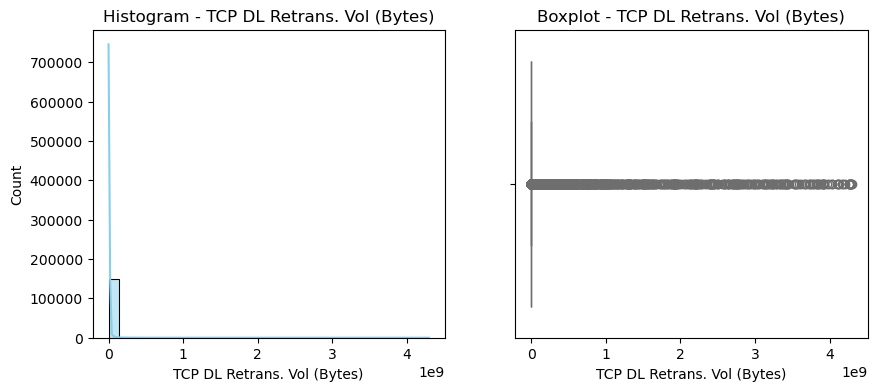

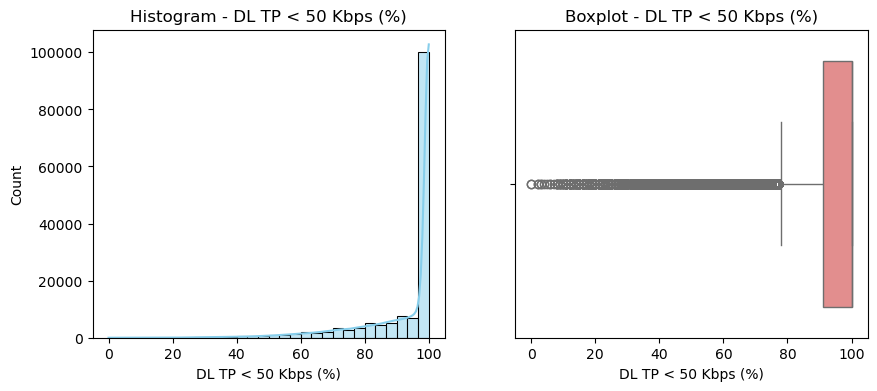

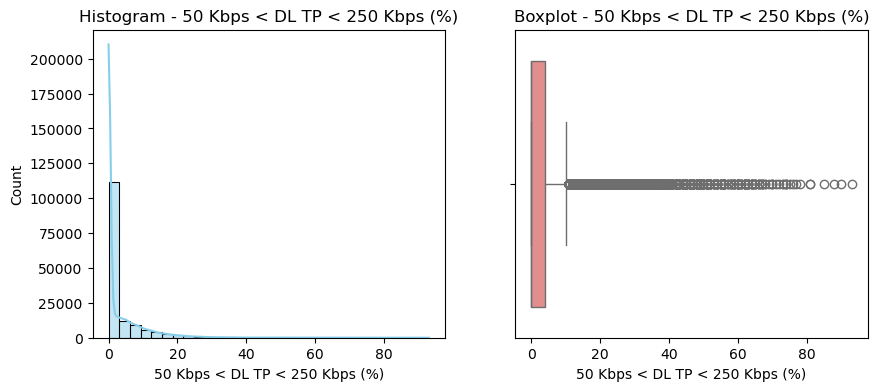

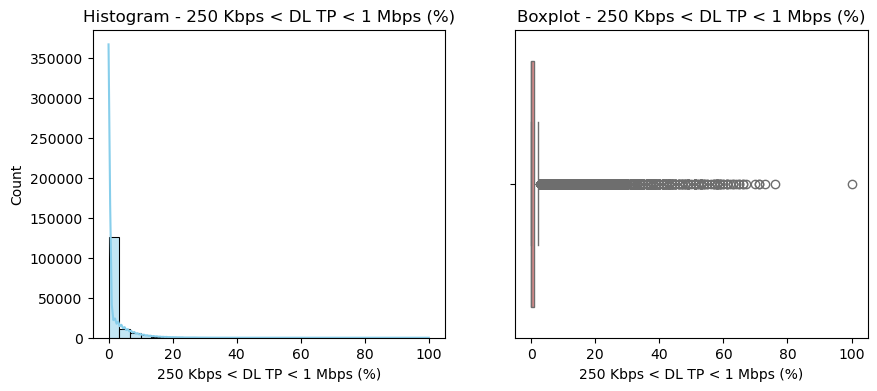

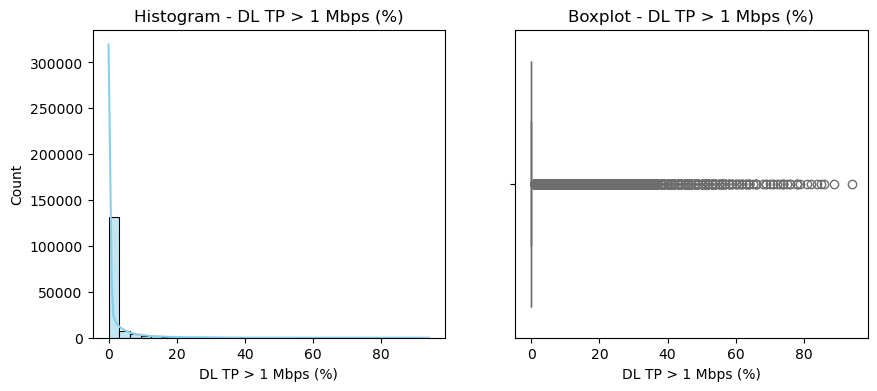

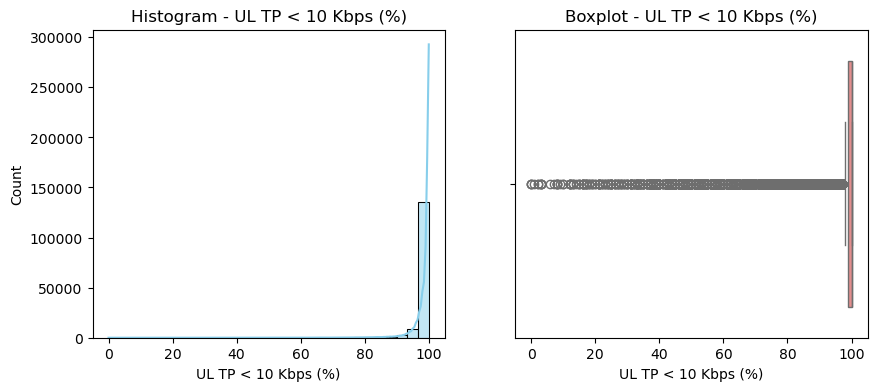

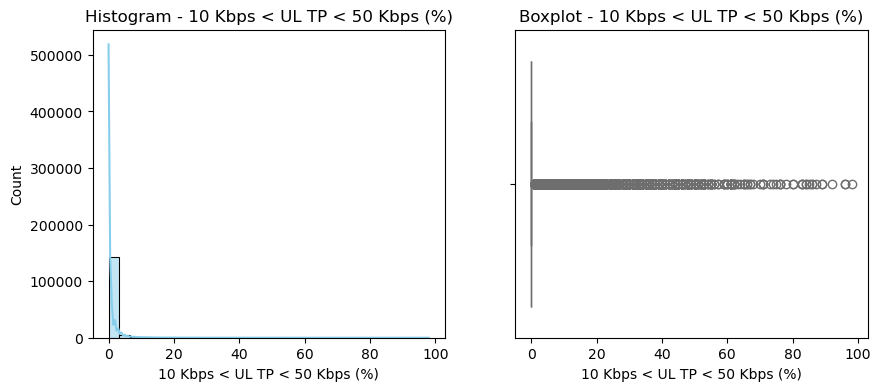

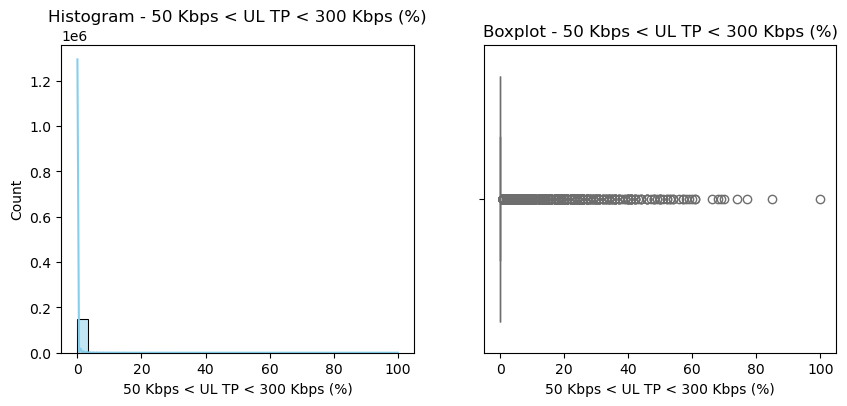

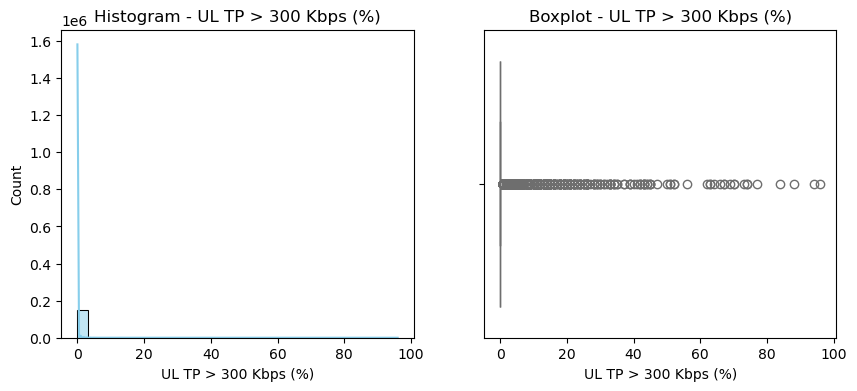

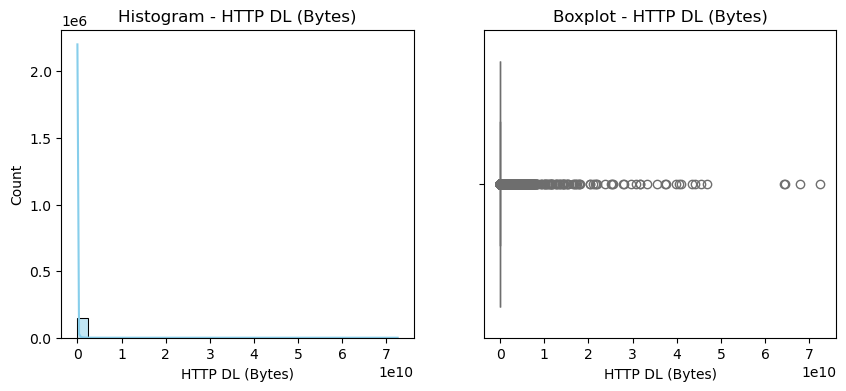

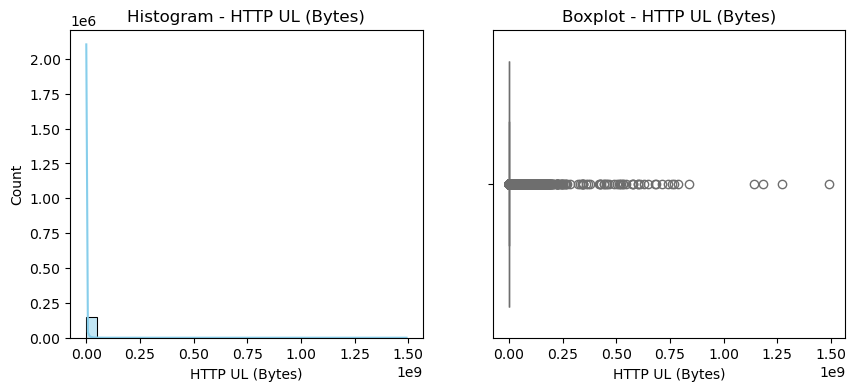

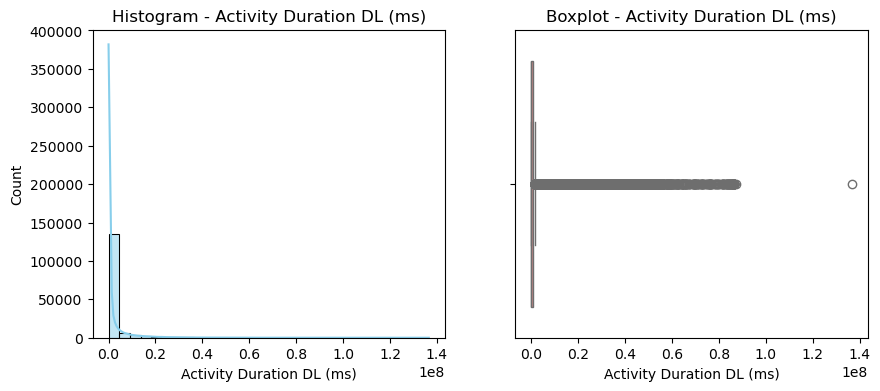

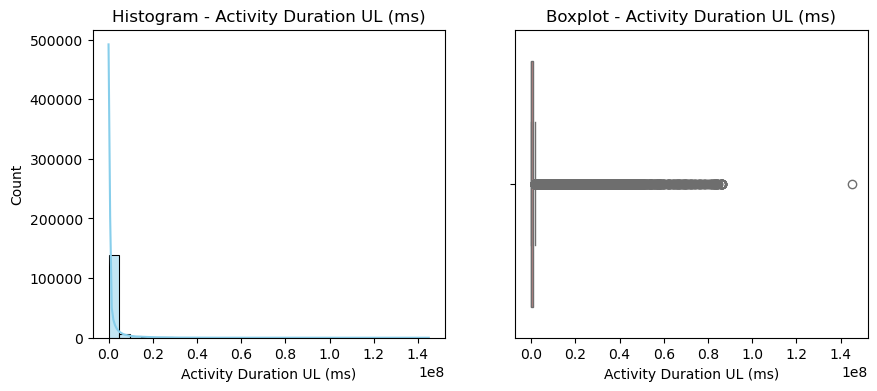

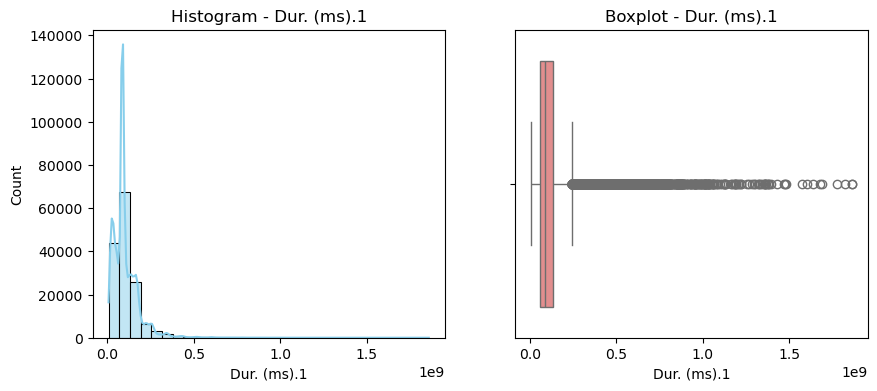

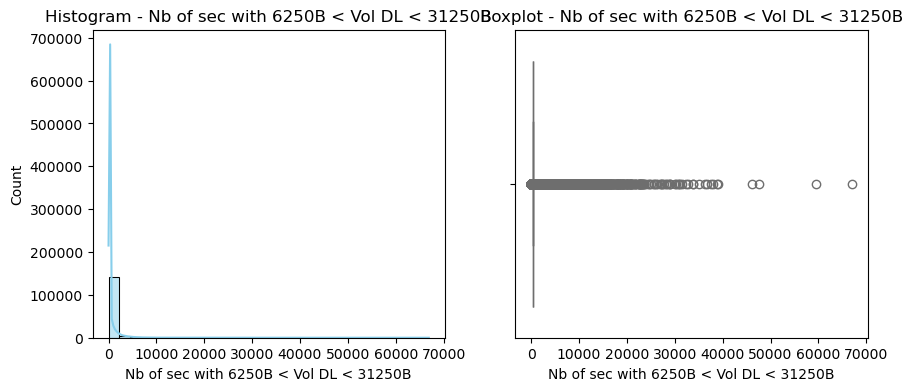

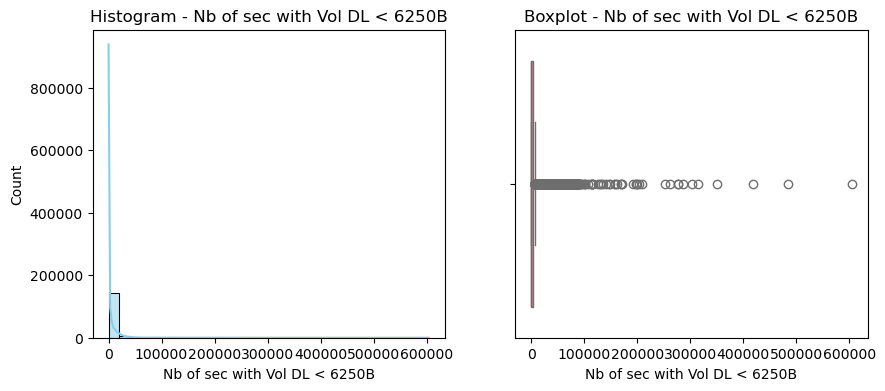

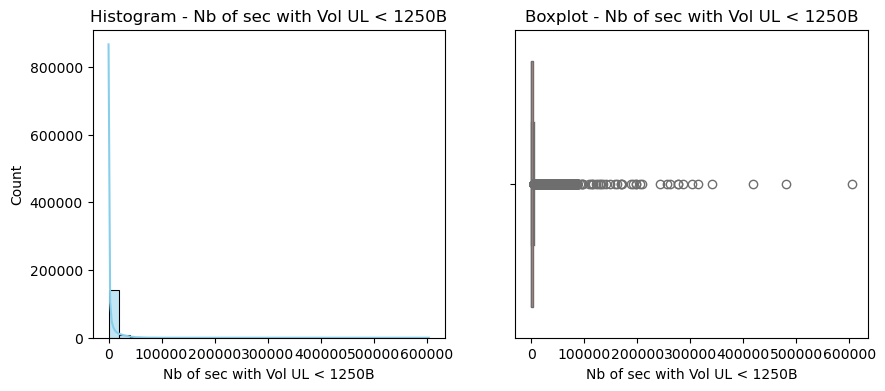

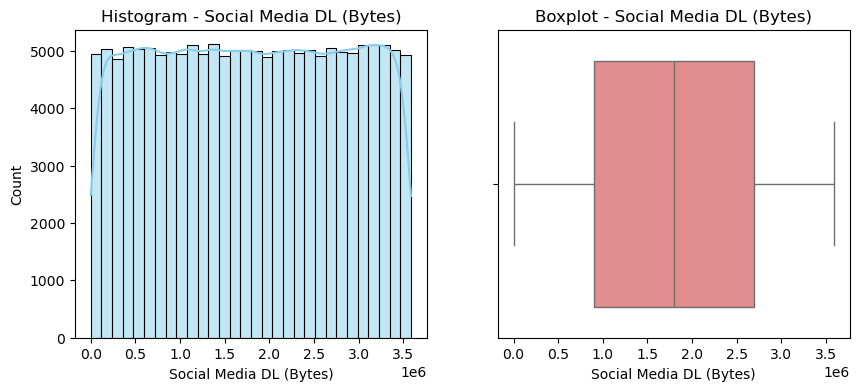

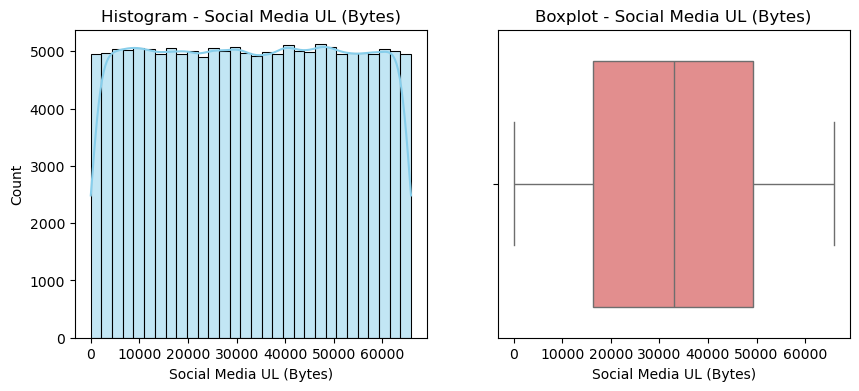

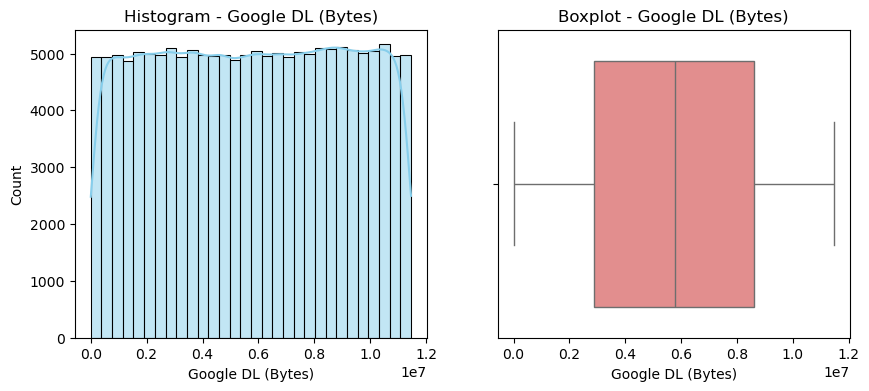

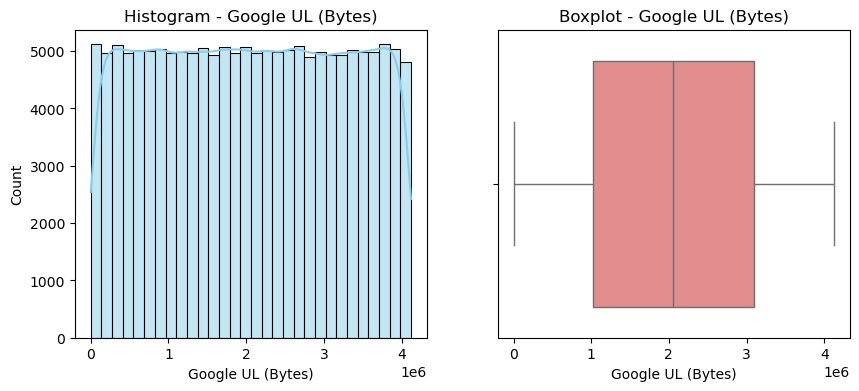

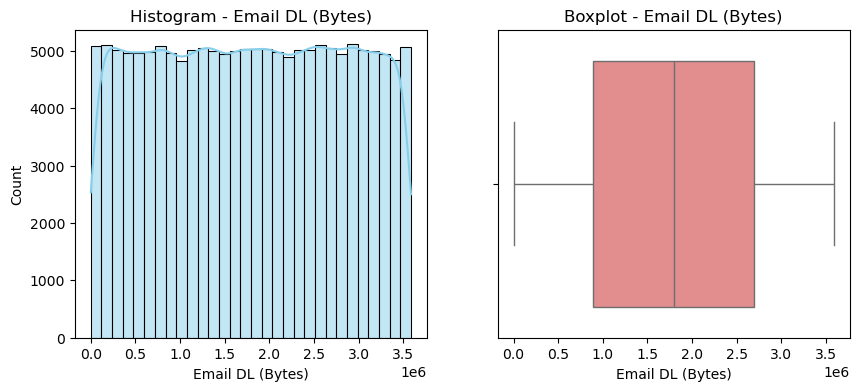

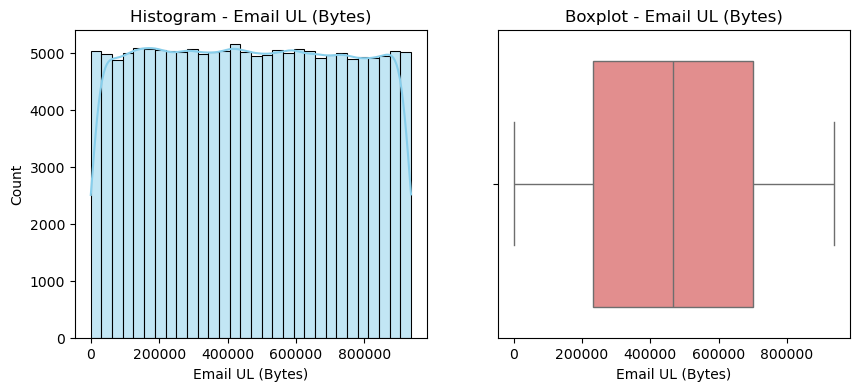

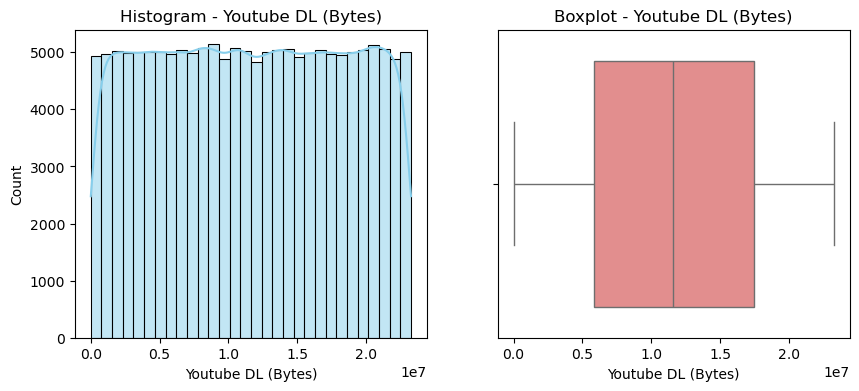

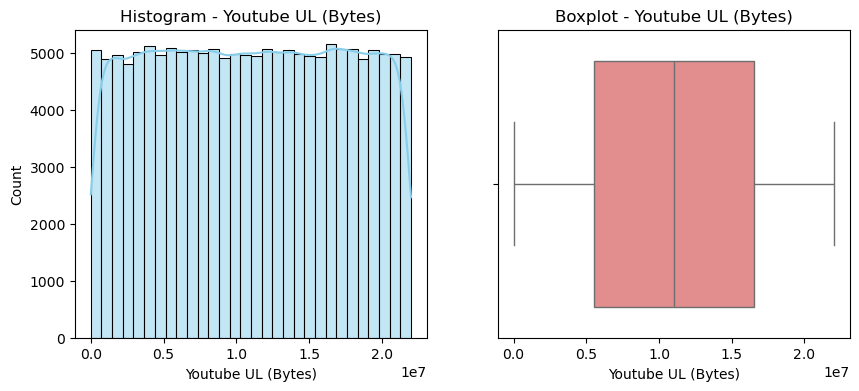

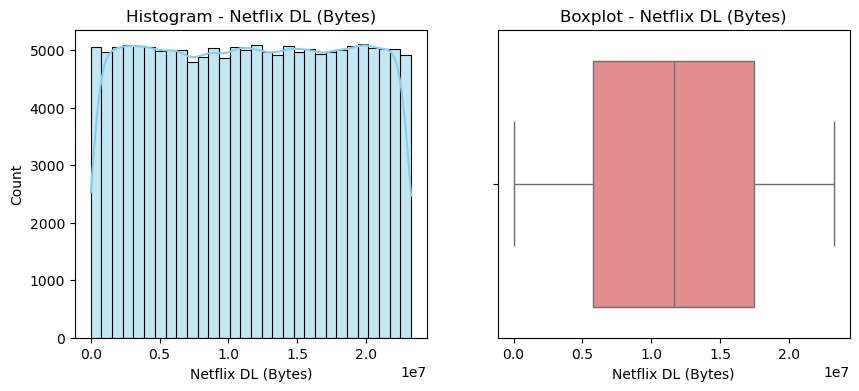

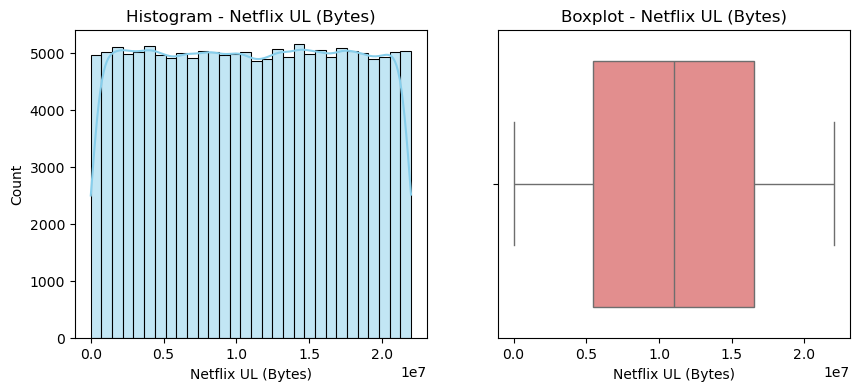

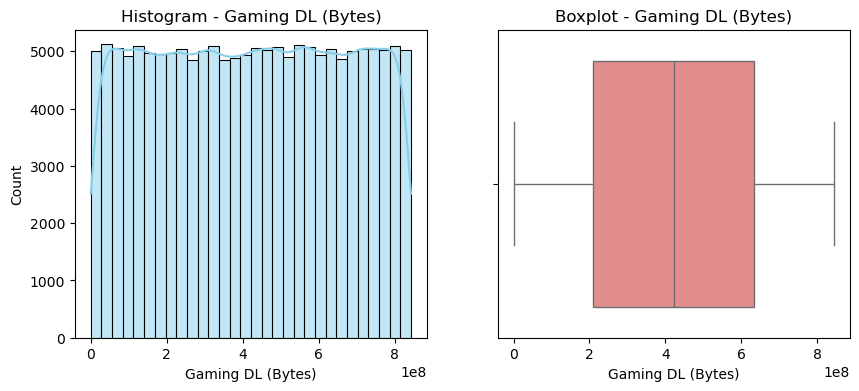

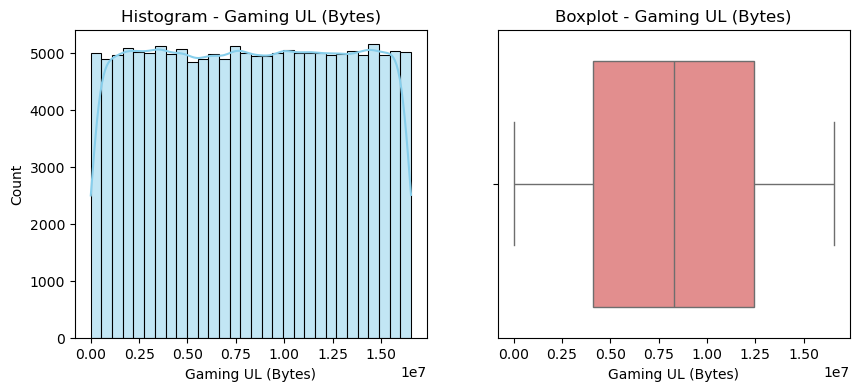

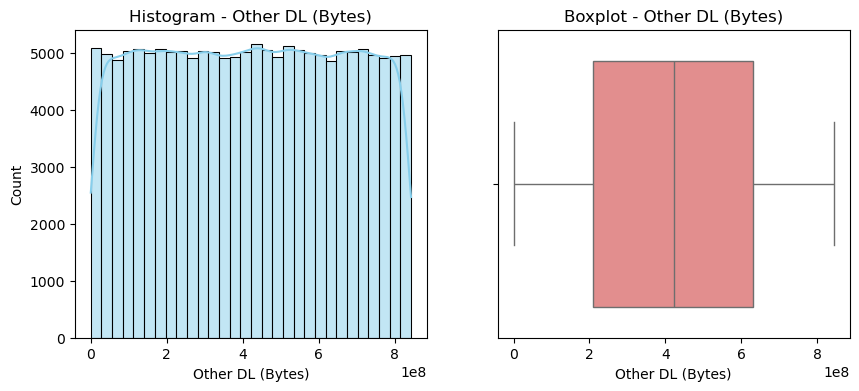

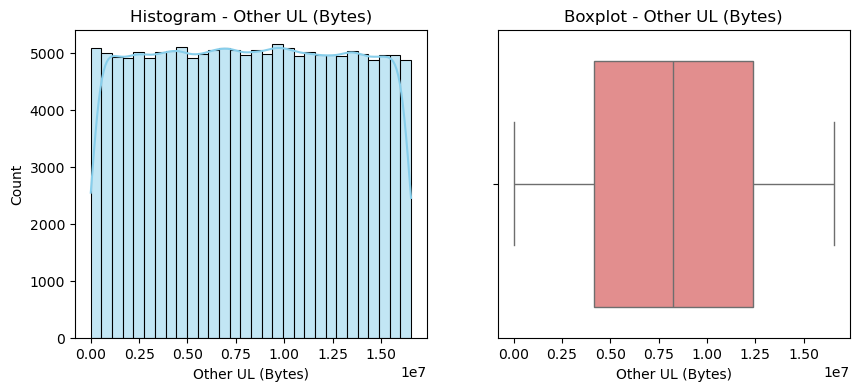

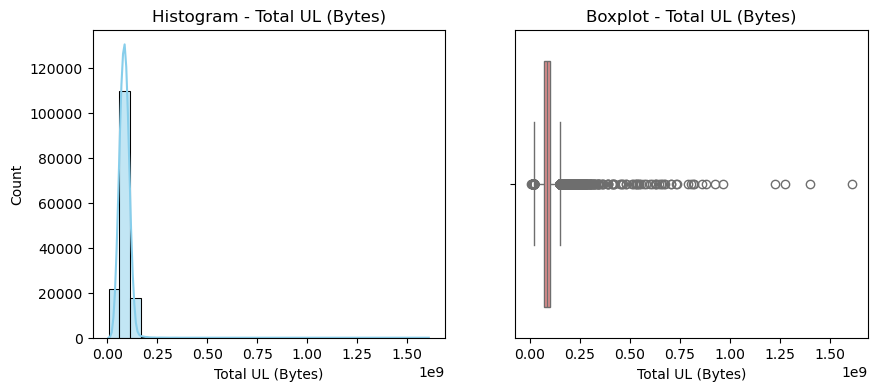

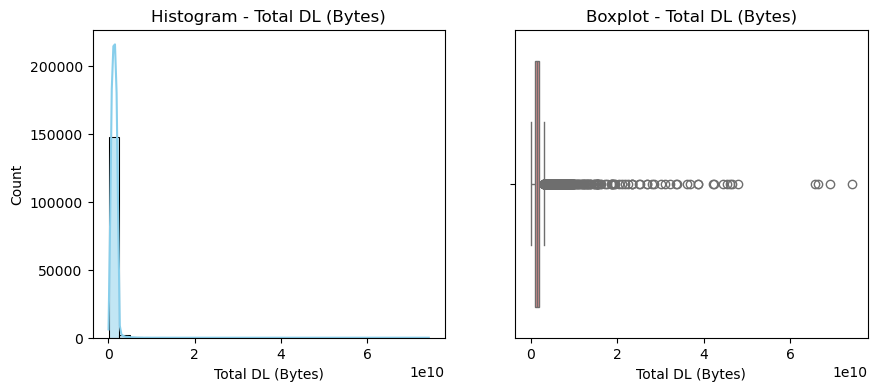

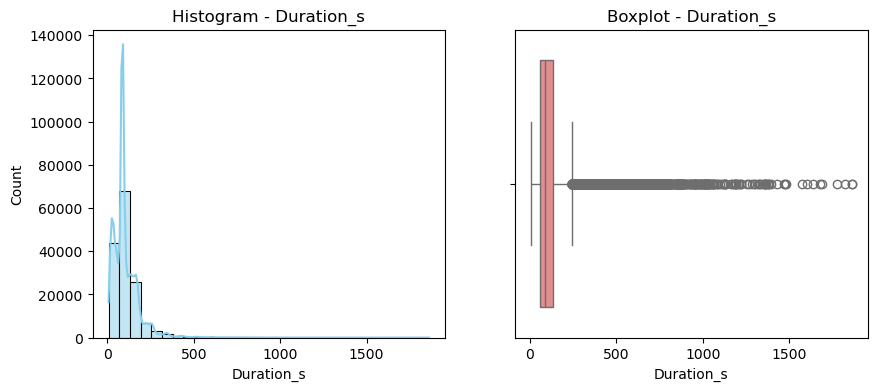

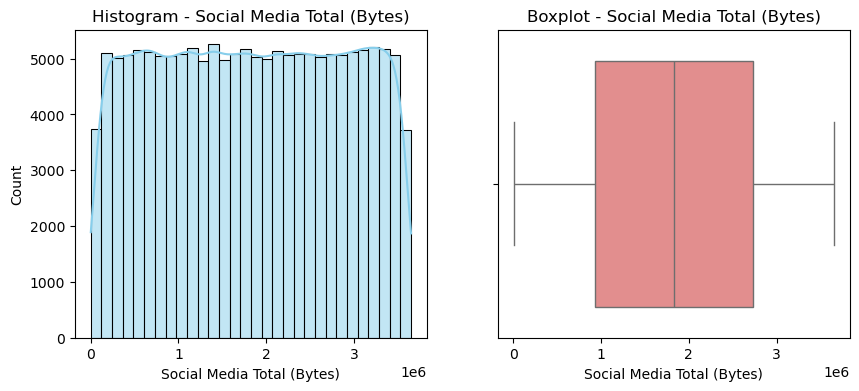

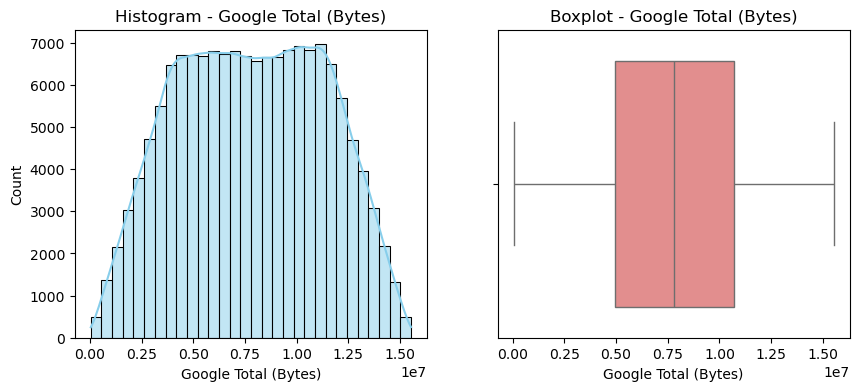

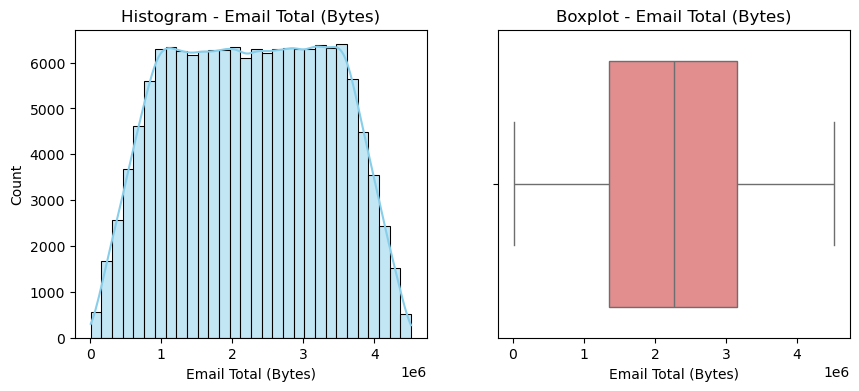

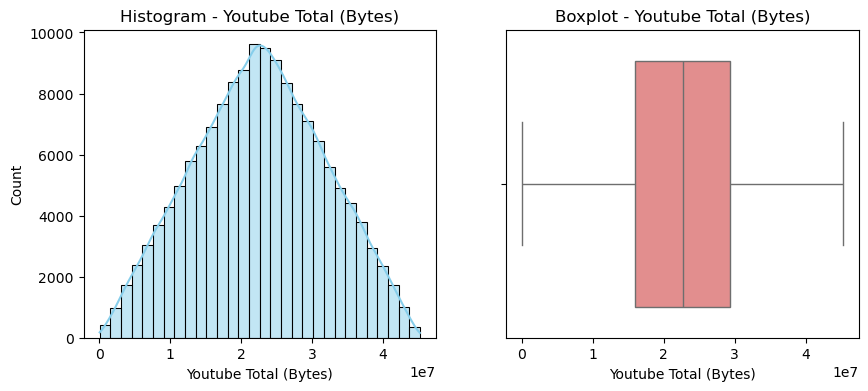

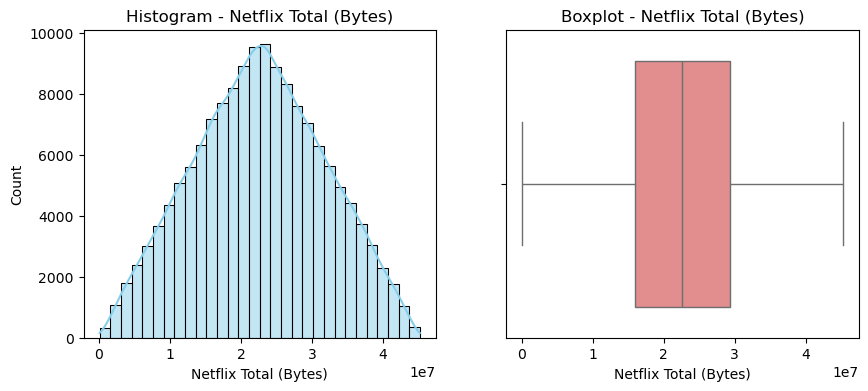

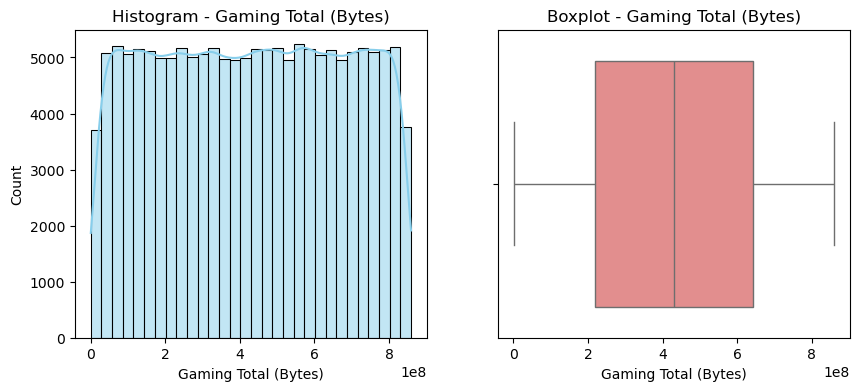

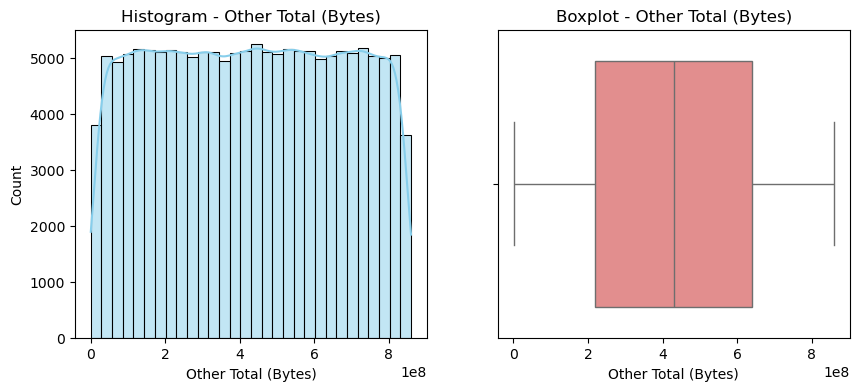

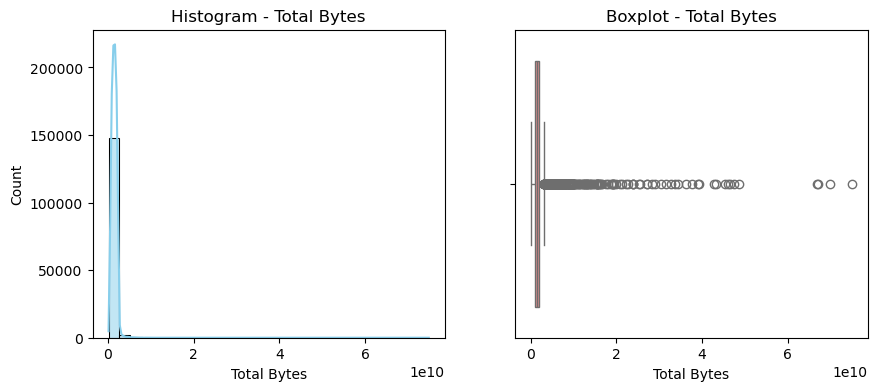

In [23]:
# --------- GRAPHICAL UNIVARIATE ANALYSIS ---------
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram - {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot - {col}")
    plt.show()

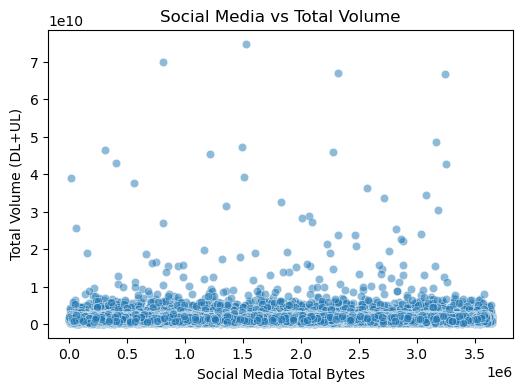

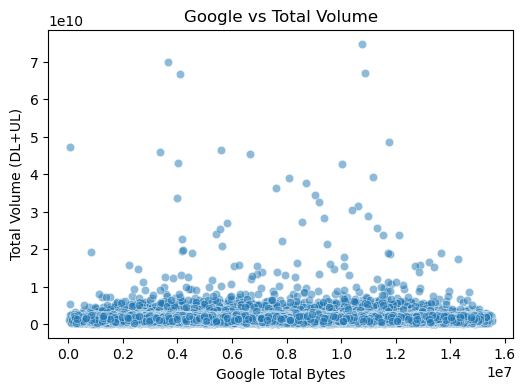

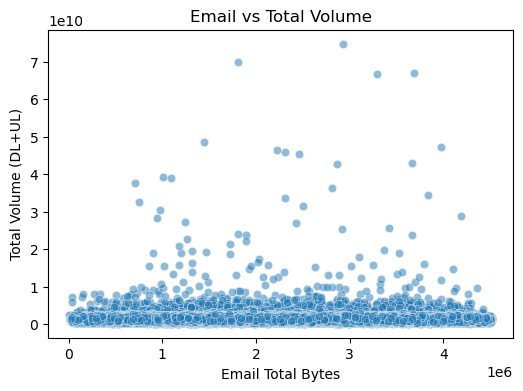

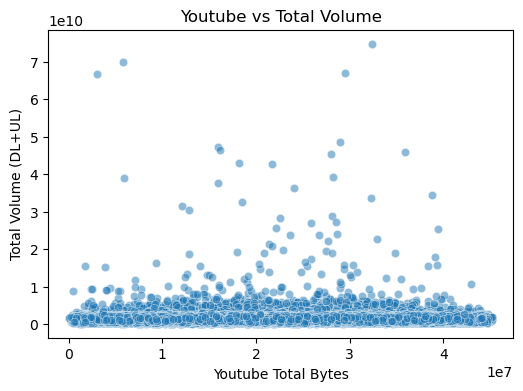

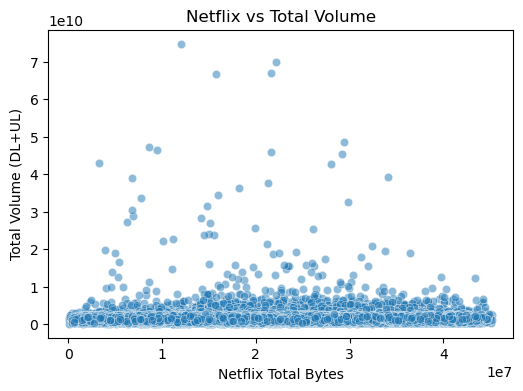

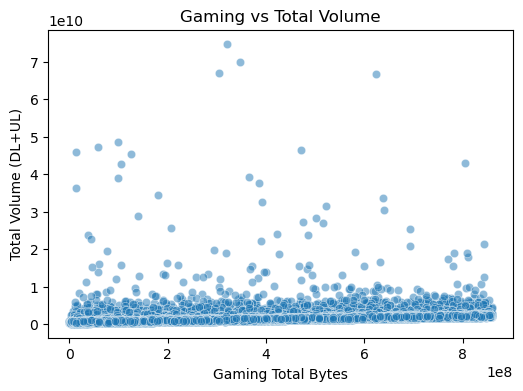

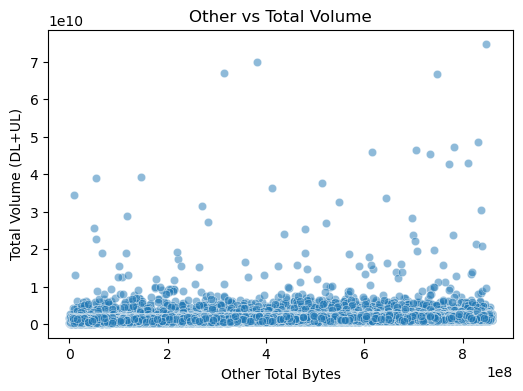

In [24]:
# ---------  BIVARIATE ANALYSIS ---------
apps = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]
df["total_volume"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

for app in apps:
    app_total = df[f"{app} DL (Bytes)"] + df[f"{app} UL (Bytes)"]
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=app_total, y=df["total_volume"], alpha=0.5)
    plt.xlabel(f"{app} Total Bytes")
    plt.ylabel("Total Volume (DL+UL)")
    plt.title(f"{app} vs Total Volume")
    plt.show()


=== Total Volume per Duration Decile ===
duration_decile
0    2.134902e+13
1    2.141198e+13
2    2.180770e+13
3    5.243442e+13
4    1.942110e+13
5    2.138442e+13
6    2.132915e+13
7    2.138758e+13
8    2.143956e+13
Name: total_volume, dtype: float64


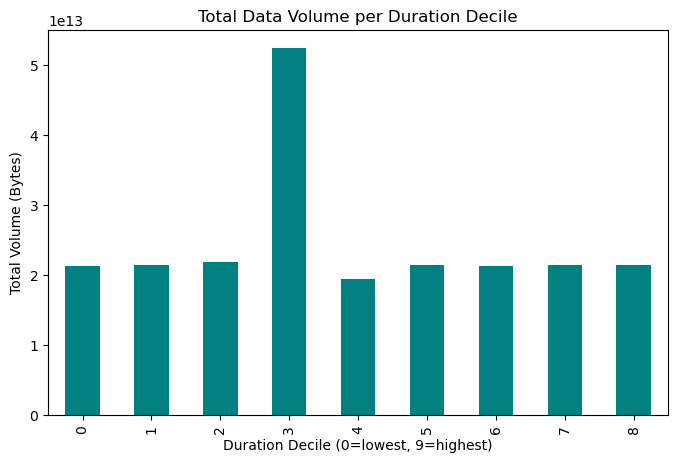

In [25]:
# ---------VARIABLE TRANSFORMATION (Decile Segmentation) ---------
df["duration_decile"] = pd.qcut(df["Dur. (ms)"], 10, labels=False,duplicates="drop")
decile_summary = df.groupby("duration_decile")["total_volume"].sum()
print("\n=== Total Volume per Duration Decile ===")
print(decile_summary)

plt.figure(figsize=(8,5))
decile_summary.plot(kind="bar", color="teal")
plt.title("Total Data Volume per Duration Decile")
plt.xlabel("Duration Decile (0=lowest, 9=highest)")
plt.ylabel("Total Volume (Bytes)")
plt.show()


=== Correlation Matrix ===
              Social Media    Google     Email   Youtube   Netflix    Gaming  \
Social Media      1.000000 -0.001708  0.004032  0.000548  0.001013  0.001082   
Google           -0.001708  1.000000 -0.000412  0.002277 -0.001902 -0.000994   
Email             0.004032 -0.000412  1.000000 -0.002919  0.001029 -0.000644   
Youtube           0.000548  0.002277 -0.002919  1.000000  0.002882 -0.002999   
Netflix           0.001013 -0.001902  0.001029  0.002882  1.000000 -0.003109   
Gaming            0.001082 -0.000994 -0.000644 -0.002999 -0.003109  1.000000   
Other             0.006065 -0.001727 -0.001299  0.002969 -0.009033 -0.002661   

                 Other  
Social Media  0.006065  
Google       -0.001727  
Email        -0.001299  
Youtube       0.002969  
Netflix      -0.009033  
Gaming       -0.002661  
Other         1.000000  


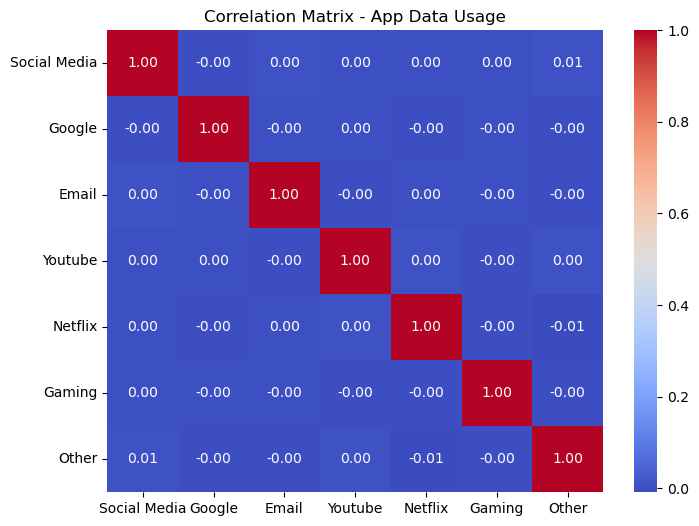

In [26]:

# --------- CORRELATION ANALYSIS ---------
app_totals = pd.DataFrame()
for app in apps:
    app_totals[app] = df[f"{app} DL (Bytes)"] + df[f"{app} UL (Bytes)"]

corr_matrix = app_totals.corr()
print("\n=== Correlation Matrix ===")
print(corr_matrix)
#---------------- Visualisation-------------
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - App Data Usage")
plt.show()


=== PCA Explained Variance ===
[0.14435994 0.14375118 0.14360322]

=== PCA Interpretation (Insights) ===
1. Most variance is explained by the first component (general heavy users).
2. Second component may capture different app usage preferences (e.g., video vs social).
3. Third component likely separates niche apps (e.g., gaming).
4. PCA confirms app usage is correlated, but dimension reduction helps clustering.


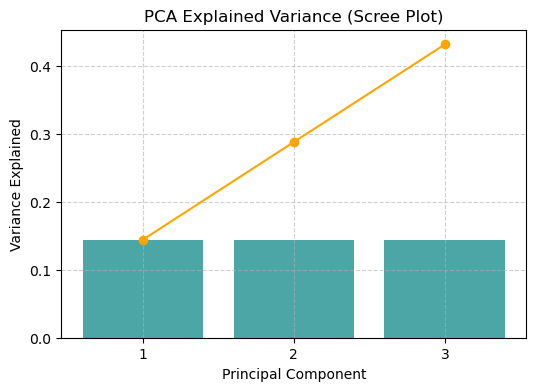

In [27]:
# --------- DIMENSIONALITY REDUCTION (PCA) ---------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(app_totals)

pca = PCA(n_components=3)
pca_fit = pca.fit(X_scaled)

print("\n=== PCA Explained Variance ===")
print(pca.explained_variance_ratio_)

print("\n=== PCA Interpretation (Insights) ===")
print("1. Most variance is explained by the first component (general heavy users).")
print("2. Second component may capture different app usage preferences (e.g., video vs social).")
print("3. Third component likely separates niche apps (e.g., gaming).")
print("4. PCA confirms app usage is correlated, but dimension reduction helps clustering.")


#-------------visuals

# Scree plot
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7, color="teal")
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_), marker="o", color="orange")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance (Scree Plot)")
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [28]:
# Save DataFrame into CSV back for next use
df.to_csv("processed_data.csv", index=False)

print("✅ DataFrame saved as processed_data.csv for next use")

✅ DataFrame saved as processed_data.csv for next use


In [29]:
### End